In [210]:
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import make_interp_spline
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from cartopy.feature import NaturalEarthFeature
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
from scipy.ndimage import gaussian_filter
from scipy.ndimage import uniform_filter
from scipy.ndimage import convolve
import matplotlib.patches as patches
import netCDF4

## Create 2020 etc map

### Trying to recreate /home/chen/codes/plots_for_storm_tracks/individual_storm_track_120.py

#### Get grid points that define the border of CRCM6 domain

In [119]:
# Define the radius of neighboring grid points to consider
radius = 0.25

# Initialize an empty list to store the filtered grid points
filtered_points = []

# Iterate through each grid point in the dataframe
for i, row in mask.iterrows():
    if row['HU'] == True:
        lat = row['lat']
        lon = row['lon']

        # Find the neighboring grid points within the specified radius
        neighbors = mask[
            (mask['lat'] >= lat - radius) & (mask['lat'] <= lat + radius) &
            (mask['lon'] >= lon - radius) & (mask['lon'] <= lon + radius)
        ]

        # Check if there is at least one false 'HU' value in the neighbors
        if neighbors['HU'].isin([False]).any():
            filtered_points.append(row)

# Create a new dataframe with the filtered grid points
filtered_mask = pd.DataFrame(filtered_points)

#filtered_mask.to_csv('/pampa/cloutier/outline_crcm6_domain.csv')

NameError: name 'mask' is not defined

In [165]:
# Domaine de NNA 

print(DomChen)
#Dom = netCDF4.Dataset('/pampa/picart/Masks/mask_GEM5_ERA5grid', 'r')


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: 
    institution: Universite du Quebec a Montreal
    contact: roberge.francois@uqam.ca
    comment: 
    model: CRCM6-GEM5
    model_grid: 
    geophysical_fields: 
    physics: 
    forcing: 
    creation_date: 
    experiment: 
    experiment_id: 
    driving_experiment: 
    driving_model_id: 
    driving_model_ensemble_member: 
    driving_experiment_name: 
    frequency: 
    institute_id: 
    model_id: 
    rcm_version_id: 
    project_id: 
    CORDEX_domain: 
    product: output
    references: 
    dimensions(sizes): rlon(1132), rlat(1060), plev(1), time(1)
    variables(dimensions): float64 rlon(rlon), float64 rlat(rlat), float64 plev(plev), float64 time(time), float64 lon(rlat, rlon), float64 lat(rlat, rlon), |S1 rotated_pole(), float32 sftlf(rlat, rlon)
    groups: 


In [4]:
latChen = DomChen.variables['lat'][:,:]
lonChen = DomChen.variables['lon'][:,:]

# latD = filtered_mask['lat'].tolist()
# lonD = filtered_mask['lon'].tolist()

In [264]:
DomChen=netCDF4.Dataset('/home/chen/codes/2p5kmDomain/var_MG_free_grid_date.nc3','r')
rlat = DomChen.variables['rlat'][:]
print(rlat)
print(DomChen)
DomChen.close()

[-9.90250015 -9.88000011 -9.85750008 ... 13.88000011 13.90250015
 13.92500019]
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: 
    institution: Universite du Quebec a Montreal
    contact: roberge.francois@uqam.ca
    comment: 
    model: CRCM6-GEM5
    model_grid: 
    geophysical_fields: 
    physics: 
    forcing: 
    creation_date: 
    experiment: 
    experiment_id: 
    driving_experiment: 
    driving_model_id: 
    driving_model_ensemble_member: 
    driving_experiment_name: 
    frequency: 
    institute_id: 
    model_id: 
    rcm_version_id: 
    project_id: 
    CORDEX_domain: 
    product: output
    references: 
    dimensions(sizes): rlon(1132), rlat(1060), plev(1), time(1)
    variables(dimensions): float64 rlon(rlon), float64 rlat(rlat), float64 plev(plev), float64 time(time), float64 lon(rlat, rlon), float64 lat(rlat, rlon), |S1 rotated_pole(), float32 sftlf(rlat, rlon)
    groups: 


In [2]:
def lambert_map(extent=(-82, -75, 41, 46), cent_lon =-80,figsize=(14, 12), fig = None, ax = None):

    proj = ccrs.LambertConformal(central_longitude=cent_lon, central_latitude=35,
                                 standard_parallels=[35])
    if ax == None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1, projection=proj)
        

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',  name='admin_1_states_provinces_lines',
        scale='50m', facecolor='none', zorder=15)
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='0.9')
    lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='None',
                                            facecolor=[(0.59375 , 0.71484375, 0.8828125)])
    lakes_50m_edge= cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='dimgray',
                                            facecolor='None',lw=1.2)
    #(0.59375 , 0.71484375, 0.8828125)
    ax.add_feature(NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', 
                                   scale='50m', edgecolor='dimgray', facecolor='none', zorder=10))
    ax.add_feature(land_50m,edgecolor='dimgray');
    #ax.add_feature(lakes_50m, zorder=3);
    ax.add_feature(lakes_50m_edge, zorder=10);
    #ax.add_feature(cfeature.LAKES, edgecolor='dimgray', zorder=10);
    ax.add_feature(cfeature.BORDERS, zorder=10,edgecolor='dimgray');
    #ax.add_feature(states_provinces, edgecolor='dimgray', zorder=10)
    ax.coastlines('50m', zorder=15, color='dimgray',lw=1.2)
    # Set plot bounds
    ax.set_extent(extent)
    return fig, ax

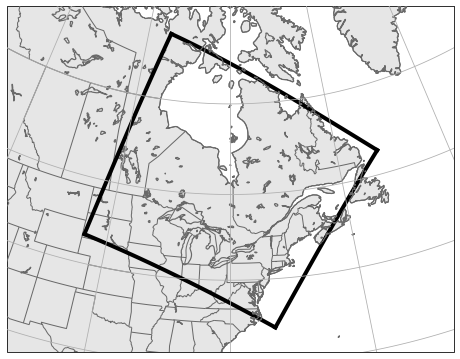

In [16]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np                         
import matplotlib.pyplot as plt           
import matplotlib.colors as colors
from matplotlib.path import Path
import matplotlib.patches as patches

fig, ax = lambert_map(extent=(-110, -50, 27.5, 67.3), figsize=(8,10))

cf2=plt.plot(lonChen[0,:],latChen[0,:],c='black', lw=4,transform=ccrs.PlateCarree(),zorder=15)
cf2=plt.plot(lonChen[:,0],latChen[:,0],c='black',lw=4,transform=ccrs.PlateCarree(),zorder=15)
cf2=plt.plot(lonChen[-1,:],latChen[-1,:],c='black',lw=4,transform=ccrs.PlateCarree(),zorder=15)
cf2=plt.plot(lonChen[:,-1],latChen[:,-1],c='black',lw=4,transform=ccrs.PlateCarree(),zorder=15)

#bnd=plt.plot(lonD, latD, zorder=15, transform=ccrs.PlateCarree(), s=2)

ax.gridlines(zorder=21)

#plt.savefig('/pampa/cloutier/fig/comp_dom_chen_crcm6.png', dpi=300)

plt.show()

### filtered storm tracks

In [211]:
def add_features():
    
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',  name='admin_1_states_provinces_lines',
        scale='50m', facecolor='none', edgecolor='black', zorder=6, lw=0.5)
    
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='None', zorder=4, lw=0.5)
    
    lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='black', facecolor='none', zorder=7, lw=0.5)
    
    lakes_50m_edge= cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='black',
                                            facecolor='None',lw=0.5, zorder=9)

    ax.add_feature(land_50m)    
    ax.add_feature(lakes_50m_edge)
    ax.add_feature(cfeature.BORDERS, zorder=6, edgecolor='black', lw=0.5)  
#     ax.add_feature(states_provinces)
    ax.coastlines('50m', zorder=7, color='black',lw=0.5)

In [261]:
df = pd.read_csv('/pampa/cloutier/storm_tracks/filtered/etc24_consec_season.csv', index_col=0)
data = df.loc[(df.datetime // 1000000 >= 2020)]
bnd = pd.read_csv('/pampa/cloutier/outline_crcm6_domain.csv')

In [123]:
cat = pd.read_csv("~data/ReAnalysis/ERA5/Storm_analysis/NAECv1/NAEC_1979_2020_v1.csv")

In [126]:
# get the percentage 
100 * (len(df.groupby('storm').mean()) / len(cat.groupby('storm').mean()))

13.176719232645098

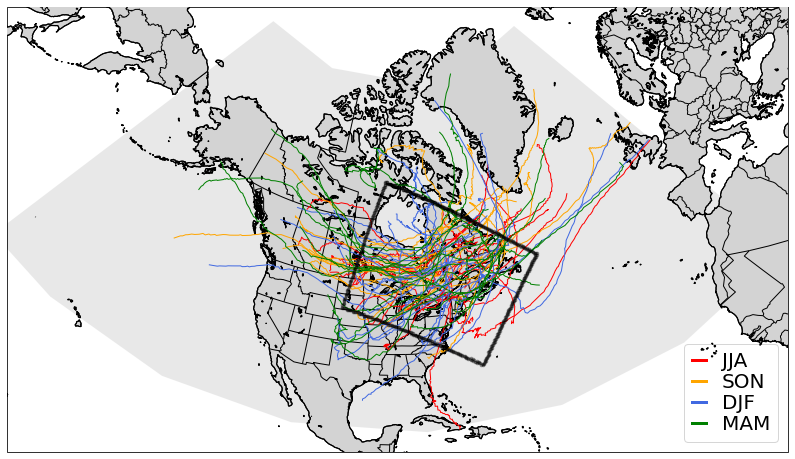

In [262]:
seasons = ['JJA', 'SON', 'DJF', 'MAM']
colors = ['red', 'orange', 'royalblue', 'green']

fig = plt.figure(figsize = (14, 12))
proj = ccrs.LambertConformal(central_longitude=-88, central_latitude=53, standard_parallels=[35])
extent = (-160, -15, 5, 80)
ax = fig.add_subplot(1, 1, 1, projection = proj)
ax.set_extent(extent)
add_features()
i = 1

#Iterate over each dataframe and its corresponding color
for szn, color in zip(seasons, colors):
    df = data.loc[data.season == szn]
#     ax = fig.add_subplot(2, 2, i, projection = proj)
#     ax.set_extent(extent)
#     add_features()
#     bnd = ax.scatter(lonD, latD, color='gray', s=10, alpha=1, zorder=11,transform=ccrs.PlateCarree())
    # Iterate over each storm in the current dataframe
    for storm_id, storm_data in df.groupby('storm'):
        # Convert latitude and longitude to map projection coordinates
        lat = storm_data['latitude']
        lon = storm_data['longitude']
        
        # Plot the line for the current storm with the corresponding color
        ax.plot(lon, lat, color=color, linewidth=1, transform=ccrs.PlateCarree(),zorder=10)
    i += 1

        
latD = bnd['lat']
lonD = bnd['lon']
bnd = ax.scatter(lonD, latD, color='black', s=7, alpha=0.3, zorder=11,transform=ccrs.PlateCarree())

# Create a custom legend outside the loop
legend_elements = [Line2D([0], [0], color='red', linewidth=3, label='JJA'),
                   Line2D([0], [0], color='orange', linewidth=3, label='SON'),
                   Line2D([0], [0], color='royalblue', linewidth=3, label='DJF'),
                   Line2D([0], [0], color='green', linewidth=3, label='MAM')]

# Add the legend to the plot
plt.legend(handles=legend_elements, loc='lower right', fontsize="20", 
           ncol=1, labelspacing=0.1, handlelength=0.7 )


min_lon, max_lon, min_lat, max_lat = 0, -180, 20, 80
# Add the model domain area as a light gray rectangle
ax.add_patch(mpatches.Rectangle(xy=(min_lon, min_lat), width=max_lon - min_lon, height=max_lat - min_lat,
                                transform=ccrs.PlateCarree(), facecolor='lightgray', alpha=0.5))


plt.savefig("/pampa/cloutier/fig/filtered_etc_2000.png", dpi=300, bbox_inches='tight')
plt.show()


In [7]:
import pandas as pd
import xarray as xr
import numpy as np
import netCDF4

# matplotlib import
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# cartopy import
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

# scipy import
from scipy.interpolate import griddata
from scipy.ndimage import convolve

In [213]:
def add_features():
    
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',  name='admin_1_states_provinces_lines',
        scale='50m', facecolor='none', edgecolor='black', zorder=6)
    
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='lightgray', zorder=4)
    
    lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='black', facecolor='none', zorder=7)
    
    lakes_50m_edge= cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='black',
                                            facecolor='None',lw=1.2, zorder=9)

    ax.add_feature(land_50m)    
    ax.add_feature(lakes_50m)
    ax.add_feature(lakes_50m_edge)
    ax.add_feature(cfeature.BORDERS, zorder=6, edgecolor='black')  
    ax.add_feature(states_provinces)
    ax.coastlines('50m', zorder=7, color='black',lw=1.2)

In [188]:
bnd = pd.read_csv('/pampa/cloutier/outline_crcm6_domain.csv')

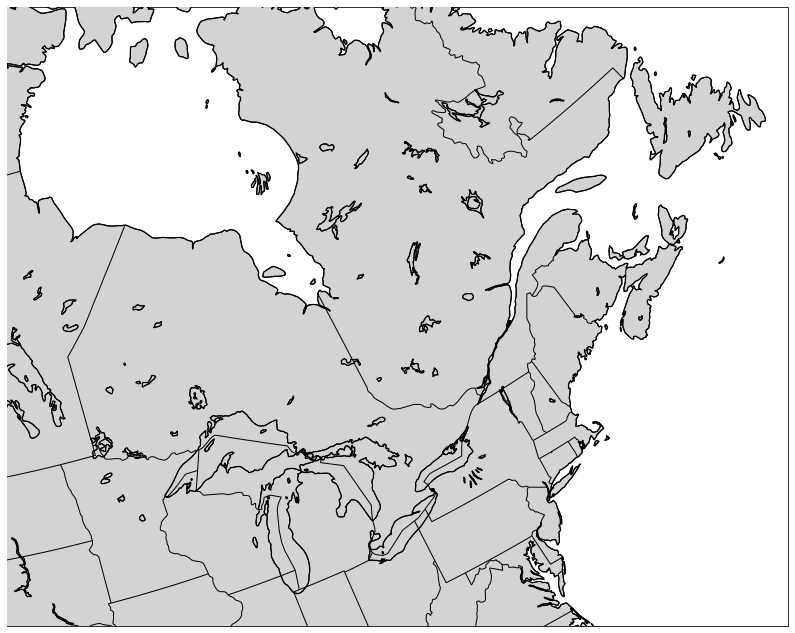

In [209]:
# plot CRCM6 domain

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cf

rotated_pole = ccrs.RotatedPole(pole_latitude=37, pole_longitude=65, central_rotated_longitude = 0)
fig, ax = plt.subplots(1, 1, subplot_kw={ 'projection': rotated_pole}, figsize=(14,12))
plt.subplots_adjust(wspace=0.3)
#ax.set_extent((9.572,38.84,-8.607,14.57), crs=rotated_pole)
ax.set_extent((9.572,38.84,-8.607,14.57), crs=rotated_pole)
add_features()
plt.show()

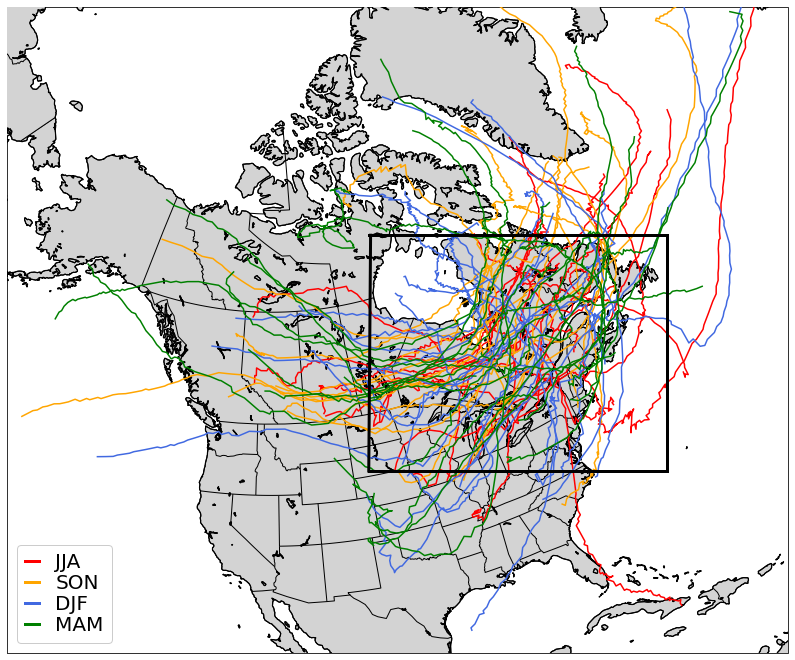

In [299]:
# Plot CRCM6 domain and 2020 filtered storms

# read storm tracks and keep year 2020
tracks = pd.read_csv('/pampa/cloutier/storm_tracks/filtered/etc24_consec_season.csv', index_col=0)
data = tracks.loc[(tracks.datetime // 1000000 >= 2020)]

seasons = ['JJA', 'SON', 'DJF', 'MAM']
colors = ['red', 'orange', 'royalblue', 'green']

# Create rotated poles projection. 
rotated_pole = ccrs.RotatedPole(pole_latitude=37, pole_longitude=65, central_rotated_longitude = 0)
fig, ax = plt.subplots(1, 1, subplot_kw={ 'projection': rotated_pole}, figsize=(14,12))
ax.set_extent([-140, -60, 22, 90])
add_features()
i = 1

#Iterate over each dataframe and its corresponding color
for szn, color in zip(seasons, colors):
    df = data.loc[data.season == szn]
    # Iterate over each storm in the current dataframe
    for storm_id, storm_data in df.groupby('storm'):
        # Convert latitude and longitude to map projection coordinates
        lat = storm_data['latitude'].values
        lon = storm_data['longitude'].values
        
        # transform lat and lon for rotated poles 
        rot_coords = rotated_pole.transform_points(ccrs.PlateCarree(), lon, lat)
        
        # Plot the line for the current storm with the corresponding color
        ax.plot(rot_coords[:, 0], rot_coords[:, 1], color=color, linewidth=1.5, transform=rotated_pole,zorder=10)
        
    i += 1

# Plot CRCM6 domain
ax.plot([9.572, 9.752], [-8.604, 14.57], transform=rotated_pole, c='black', zorder=15, linewidth=3)
ax.plot([38.84, 38.84], [-8.604, 14.57], transform=rotated_pole, c='black', zorder=15, linewidth=3)
ax.plot([9.572, 38.84], [-8.604, -8.604], transform=rotated_pole, c='black', zorder=15, linewidth=3)
ax.plot([9.572, 38.84], [14.57,14.57], transform=rotated_pole, c='black', zorder=15, linewidth=3)


# Create legend
legend_elements = [Line2D([0], [0], color='red', linewidth=3, label='JJA'),
                   Line2D([0], [0], color='orange', linewidth=3, label='SON'),
                   Line2D([0], [0], color='royalblue', linewidth=3, label='DJF'),
                   Line2D([0], [0], color='green', linewidth=3, label='MAM')]

# Add the legend to the plot
legend = plt.legend(handles=legend_elements, loc='lower left', fontsize="20", 
                    ncol=1, labelspacing=0.1, handlelength=0.7)

# Get the legend box
legend.get_frame().set_alpha(4)  

# Add ERA5 
plt.show()

